In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base= automap_base()
# reflect the tables
base.prepare(autoload_with=engine)


In [7]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
measurement= base.classes.measurement
station = base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent= session.query(measurement.date).order_by(measurement.date).first()
# Calculate the date one year from the last date in data set.
latest= dt.date(2010, 1,1)- dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date >= latest).\
        filter(measurement.date <= most_recent).\
        order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(data, columns=["date", "prcp"] )
#df.columns = data.keys()

# Sort the dataframe by date
df_date= df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
#df_chart = pd.DataFrame(df_date, columns=['prcp'])
df_date.plot.bar()
plt.ylabel('Precipitation')
plt.show()

ProgrammingError: (sqlite3.ProgrammingError) Error binding parameter 2: type 'Row' is not supported
[SQL: SELECT measurement.date AS measurement_date, measurement.prcp AS measurement_prcp 
FROM measurement 
WHERE measurement.date >= ? AND measurement.date <= ? ORDER BY measurement.date]
[parameters: ('2009-01-01', ('2010-01-01',))]
(Background on this error at: http://sqlalche.me/e/14/f405)

In [88]:
df_date
most_recent



('2010-01-01',)

In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_table = df_date.describe()
summary_table

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total=session.query(func.count(station.name)).all()
total

[(9,)]

In [27]:
#Design a query to find the most active stations#  (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [measurement.station, measurement.id]
total_station=session.query(*sel).group_by(measurement.station).order_by(measurement.id.desc()).all()
total_station



[('USC00516128', 16939),
 ('USC00511918', 14960),
 ('USC00519281', 12188),
 ('USC00519523', 9519),
 ('USC00518838', 9008),
 ('USC00517948', 7636),
 ('USC00514830', 5434),
 ('USC00513117', 2725),
 ('USC00519397', 1)]

In [54]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

active_results= [func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
#active_results= session.query(active_station)#.group_by(measurement.station).order_by(measurement.id.desc()).first()
stuff= session.query(*active_results).\
    order_by(measurement.id.desc())
results =stuff.first()
results

(53.0, 87.0, 73.09795396419437)

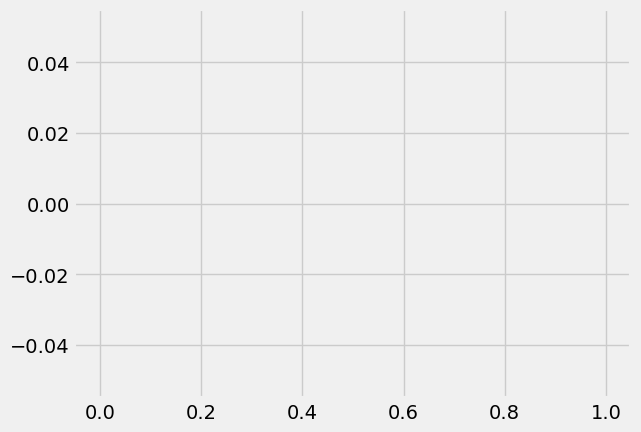

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data = session.query(measurement.tobs, measurement.tobs).\
        filter(measurement.date >= latest).\
        filter(total_station== [0]).all()

plt.hist(data)
plt.show()

# Close Session

In [76]:
# Close Session
session.close()